In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si
import math
import re
import matplotlib

In [2]:
def xsect_io(filen):
    """
    Get cross sections from files from Roger.
    
    filen: photoA.txt, or photoB or photoC.
    """
    # read in the data to a big list
    with open(filen, "r") as photo:
        filecontents = photo.read().splitlines()

    # get length of wavelengths and start index for actual values
    N = int(filecontents[0].split()[0])
    n = 2  # start at 2 to skip the line with the number of wavelength entries and the line that just says "wavelength"
    
    # collect the wavelengths, converting to nm
    wavelength = np.asarray(filecontents[n:n+N]).astype(float) / 10
    total_absorption_xsect = dict()
    total_ionization_xsect = dict()
    rxn_xsects = dict()  # cross sections by reaction

    # this collects the exact lines where a new species is declared
    specieslines = [i for i in range(len(filecontents)) if "SPECIES" in filecontents[i]]

    # loop through each species
    for i in specieslines:
        spc = filecontents[i].split()[1]
        num_rxns = int(filecontents[i].split()[2])

        # total abs spectra goes from i+3 for N items where N is the number of wavelengths, so len(wavelengthA)
        abs_start = i+3
        abs_end = abs_start + N
        total_absorption_xsect[spc] = np.asarray(filecontents[abs_start:abs_end]).astype(float)

        # start for the ion xsection is 2 after the total_abs_xsect range ends.
        # It's only 2 because we include the first item in the count of N because Python.
        # just trust me on this k?
        ion_start = abs_end + 2
        ion_end = ion_start+N
        total_ionization_xsect[spc] = np.asarray(filecontents[ion_start:ion_end]).astype(float)

        rxn_label_i = ion_end + 1
        rxn_xsect_start = rxn_label_i + 1

        # now collect xsects for each reaction
        for j in range(0, num_rxns):
            rxn_xsects[filecontents[rxn_label_i]] = np.asarray(filecontents[rxn_xsect_start:rxn_xsect_start+N]).astype(float)

            rxn_label_i += (N+2)
            rxn_xsect_start = rxn_label_i + 1

    return wavelength, total_absorption_xsect, total_ionization_xsect, rxn_xsects

In [3]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [4]:
wvsA, absA, ionA, xsectsA = xsect_io("../Resources/photoA.txt")
wvsB, absB, ionB, xsectsB = xsect_io("../Resources/photoB.txt")
wvsC, absC, ionC, xsectsC = xsect_io("../Resources/photoC.txt")

print(xsectsA)

{'CO2 + hv => CO2P + E': array([2.884e-01, 2.884e-01, 2.884e-01, 2.884e-01, 2.884e-01, 2.884e-01,
       2.884e-01, 2.884e-01, 2.884e-01, 2.884e-01, 4.513e-01, 4.513e-01,
       7.736e-01, 7.597e-01, 7.343e-01, 7.256e-01, 7.014e-01, 7.020e-01,
       9.701e-05, 6.773e-01, 6.578e-01, 6.425e-01, 6.368e-01, 6.384e-01,
       6.519e-01, 6.699e-01, 6.806e-01, 6.838e-01, 6.799e-01, 6.697e-01,
       6.499e-01, 6.296e-01, 6.245e-01, 6.224e-01, 6.258e-01, 6.451e-01,
       7.516e-01, 6.887e-01, 7.038e-01, 7.108e-01, 7.138e-01, 7.457e-01,
       7.457e-01, 7.457e-01, 7.457e-01, 8.978e-01, 8.978e-01, 8.978e-01,
       8.978e-01, 8.978e-01, 9.570e-01, 9.570e-01, 9.570e-01, 9.570e-01,
       9.570e-01, 9.590e-01, 9.590e-01, 9.590e-01, 9.590e-01, 9.590e-01,
       9.871e-01, 9.871e-01, 9.871e-01, 9.871e-01, 9.871e-01, 9.581e-01,
       9.581e-01, 9.581e-01, 9.581e-01, 9.581e-01, 8.373e-01, 8.373e-01,
       8.373e-01, 8.373e-01, 8.373e-01]), 'CO2 + hv => COP + O + E': array([1.052e-01, 1.052e-01, 1

In [5]:
rxnsA_set = set(xsectsA.keys())
rxnsB_set = set(xsectsB.keys())
rxnsC_set = set(xsectsC.keys())

In [6]:
rxns_set = rxnsA_set.union(rxnsB_set, rxnsC_set)
rxns_set

{'CO + hv => C + O + 156 + 543.8',
 'CO + hv => C + O + 166 + 543.8',
 'CO + hv => C + O + 193 + 543.8',
 'CO + hv => C + O + 543.8',
 'CO + hv => C + OP + E',
 'CO + hv => COP + E',
 'CO + hv => O + CP + E',
 'CO2 + hv => C + O + O + 156503.7',
 'CO2 + hv => C + O + O + 165513.4',
 'CO2 + hv => C + O + O + 193509.1',
 'CO2 + hv => C + O2',
 'CO2 + hv => CO + O',
 'CO2 + hv => CO + O1D',
 'CO2 + hv => CO2P + E',
 'CO2 + hv => CO2PP + E + E',
 'CO2 + hv => COP + O + E',
 'CO2 + hv => COP + OP + E',
 'CO2 + hv => CP + O2 + E',
 'CO2 + hv => CPP + O2 + E',
 'CO2 + hv => OP + CO + E',
 'CO2 + hv => OP + CP + O',
 'H + hv => HP + E',
 'H2 + hv => H + H',
 'H2 + hv => H2P + E',
 'H2 + hv => HP + H + E',
 'H2O + hv => H2OP + E',
 'H2O + hv => HP + OH+ E',
 'H2O + hv => O + H + H',
 'H2O + hv => O1D + H2',
 'H2O + hv => OH + H',
 'H2O + hv => OHP + H + E',
 'H2O + hv => OP + H2 + E',
 'H2O2 + hv => H2O2P + E',
 'H2O2 + hv => OH + OH',
 'HO2 + hv => OH + O',
 'HO2NO2 + hv => HO2 + NO2',
 'HO2NO

In [7]:
print(wvsA)
print(wvsB)
print(wvsC)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5 53.5 54.5 55.5
 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5 65.5 66.5 67.5 68.5 69.5
 70.5 71.5 72.5 73.5 74.5]
[ 74.5  75.5  76.5  77.5  78.5  79.5  80.5  81.5  82.5  83.5  84.5  85.5
  86.5  87.5  88.5  89.5  90.5  91.5  92.5  93.5  94.5  95.5  96.5  97.5
  98.5  99.5 100.5 101.5 102.5 103.5 104.5 105.5 106.5 107.5 108.5]
[108.5 109.5 110.5 111.5 112.5 113.5 114.5 115.5 116.5 117.5 118.5 119.5
 120.5 121.5 122.5 123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5 131.5
 132.5 133.5 134.5 135.5 136.5 137.5 138.5 139.5 140.5 141.5 142.5 143.5
 144.5 145.5 146.5 147.5 148.5 149.5 150.5 151.5 152.5 153.5 154.5 155.5
 156.5 157.5 158.5 159.5 160.5 161.5 162.5 163.5 164.5 165.5 166.5 167.5
 168.5 169.5 170.5 171.5 172.5 173.5 17

So for each of these sets of wavelengths and xsects we need to leave off the first entry in B and C because they overlap.

In [8]:
xsects_0_to_300 = dict()
totals_0_to_300 = dict()
fractions_0_to_300 = dict()

wvs_0_to_300 = np.hstack((wvsA, wvsB[1:], wvsC[1:]))

for rxn in rxns_set:
    norm_key = rxn.split()[0] # the which is being dissociated/ionized
    
    # need to account for whether it's ionization or dissociation
#     if "E" in rxn:
#         try:
#             iA = ionA[norm_key]  # the total ionization xsect in file A
#         except:
#             iA = np.zeros(len(wvsA))
                          
#         try:
#             iB = ionB[norm_key][1:] # the total ionization xsect in file B
#         except:
#             iB = np.zeros(len(wvsB[1:])) 

#         try:
#             iC = ionC[norm_key][1:] # the total ionization xsect in file C
#         except:
#             iC = np.zeros(len(wvsC[1:]))

#         total_xsect = np.hstack((iA, iB, iC)) 

#     else:
    try:
        aA = absA[norm_key]
    except:
        aA = np.zeros(len(wvsA))

    try:
        aB = absB[norm_key][1:]
    except:
        aB = np.zeros(len(wvsB[1:]))

    try:
        aC = absC[norm_key][1:]
    except:
        aC = np.zeros(len(wvsC[1:]))

    total_xsect = np.hstack((aA, aB, aC))
    
#     print("Normalization array is {}".format(total_xsect))
    totals_0_to_300[rxn] = total_xsect
    
    # Now stack the actual xsect data
    try:
        xA = xsectsA[rxn]
    except:
        xA = np.zeros(len(wvsA))
    
    try:
        xB = xsectsB[rxn][1:]
    except:
        xB = np.zeros(len(wvsB[1:]))
        
    try:
        xC = xsectsC[rxn][1:]
    except:
        xC = np.zeros(len(wvsC[1:]))
    
    fractions_0_to_300[rxn] = np.hstack((xA, xB, xC))
    
    xsects_0_to_300[rxn] = np.multiply(fractions_0_to_300[rxn], totals_0_to_300[rxn])

In [9]:
xsects_0_to_300

{'CO2 + hv => OP + CP + O': array([6.8784000e-21, 8.1280000e-20, 1.0747200e-19, 1.4902400e-19,
        1.5459200e-19, 9.8128000e-20, 1.5884800e-19, 2.2368000e-19,
        2.8944000e-19, 3.6720000e-19, 4.5824000e-19, 4.1418630e-19,
        3.3149349e-19, 3.3345725e-19, 3.3720786e-19, 3.2934144e-19,
        3.4001800e-19, 3.4462120e-19, 2.4394631e-15, 3.7167344e-19,
        3.5051760e-19, 2.8751940e-19, 2.4332640e-19, 1.7011840e-19,
        8.7900810e-20, 2.7877780e-20, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00

Check that the crosssections look good and there's nothing weird going on by making plots:

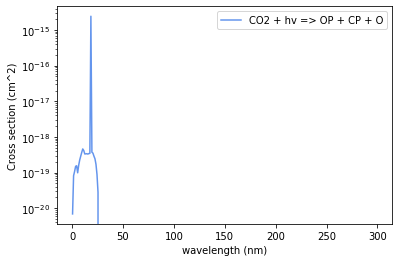

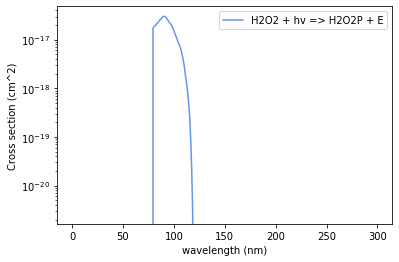

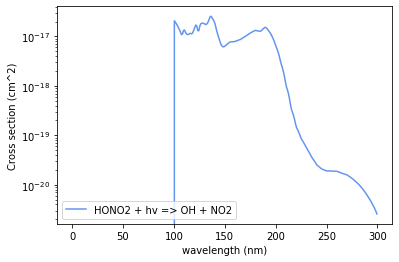

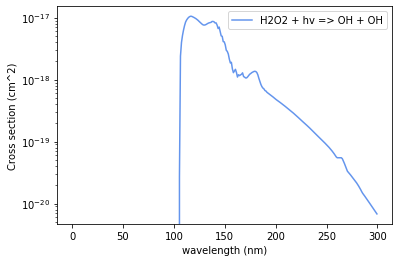

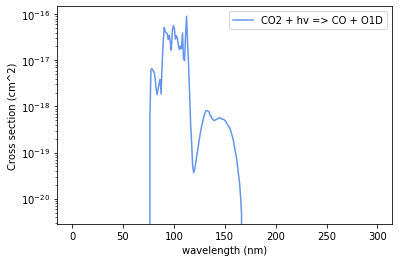

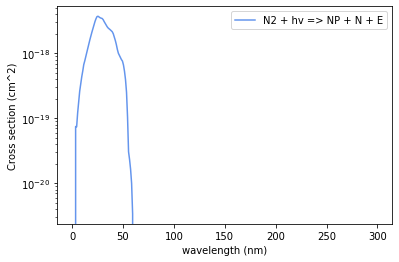

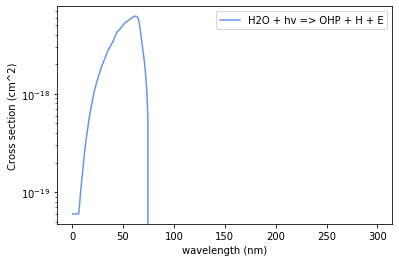

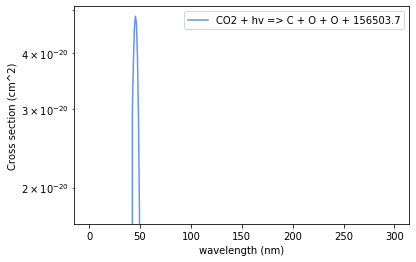

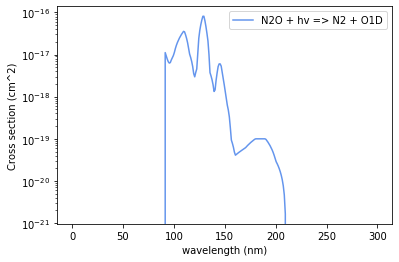

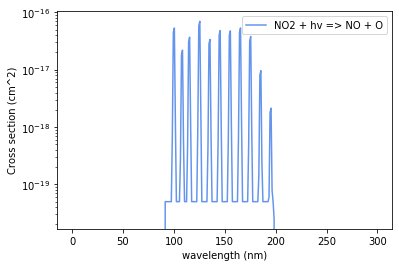

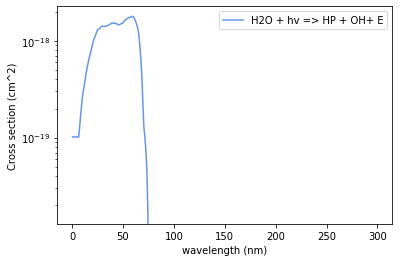

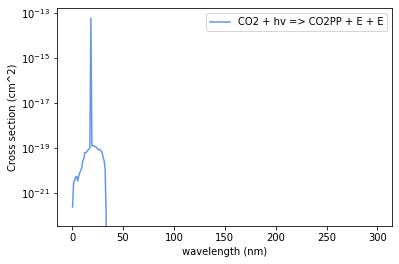

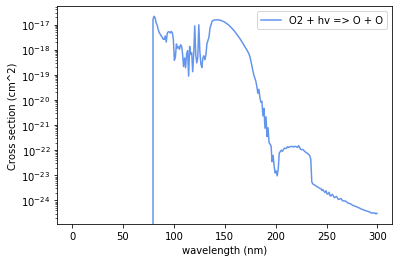

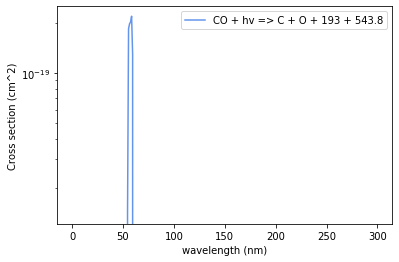

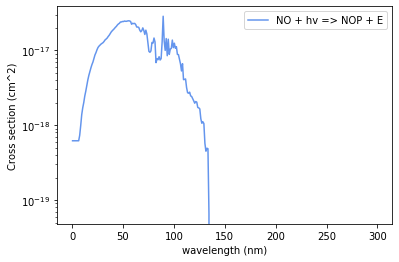

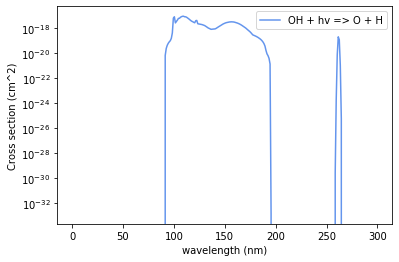

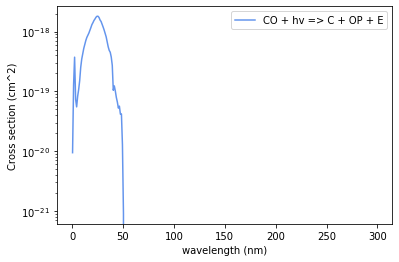

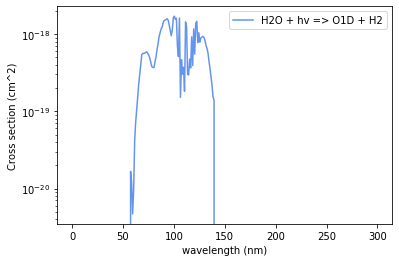

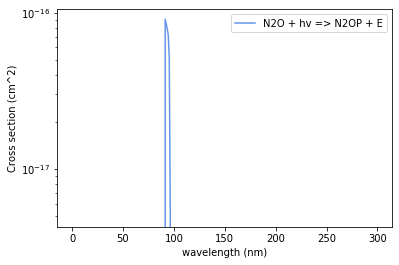

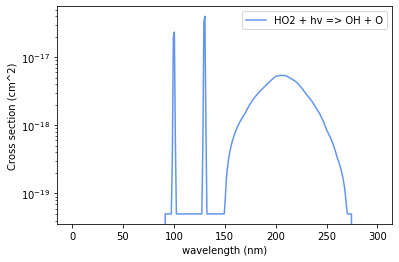

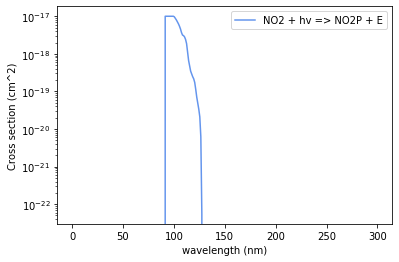

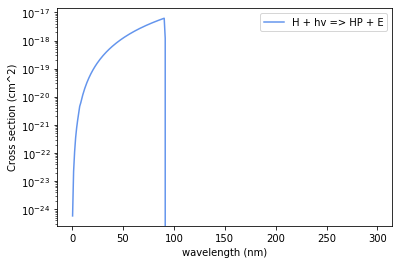

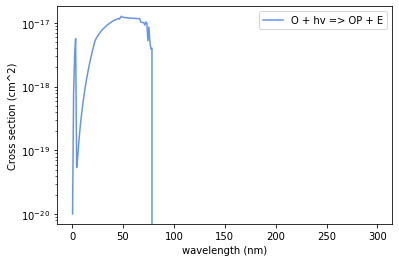

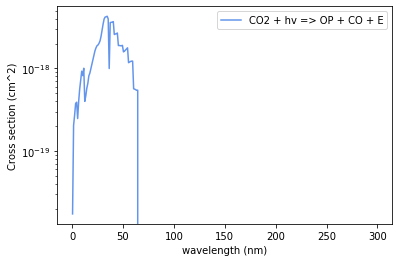

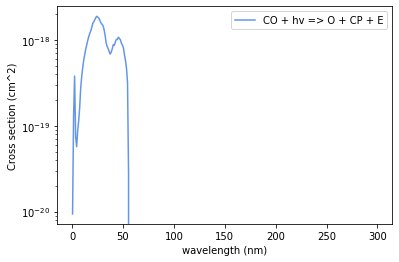

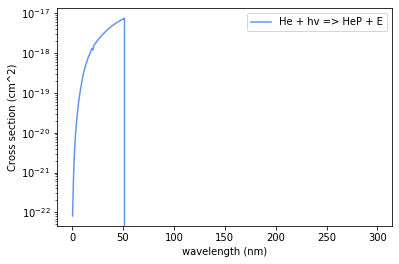

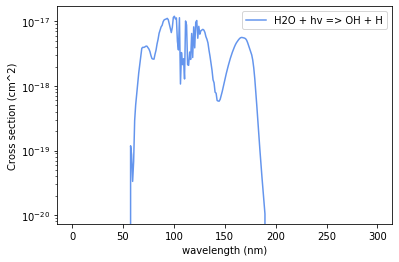

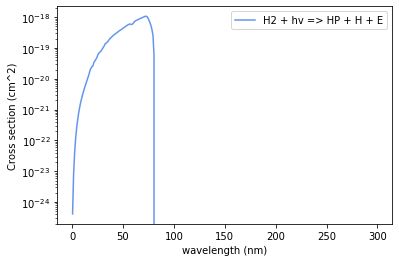

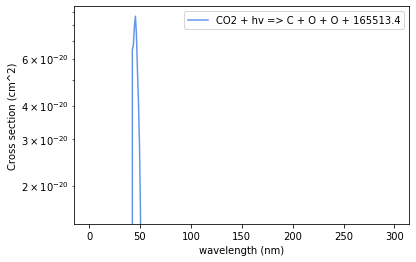

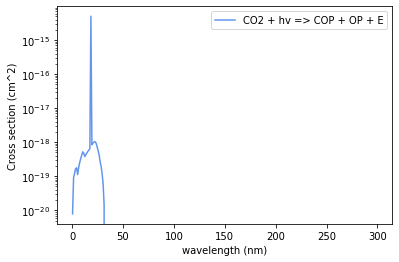

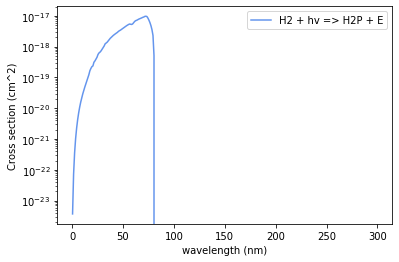

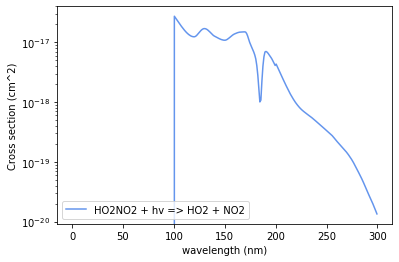

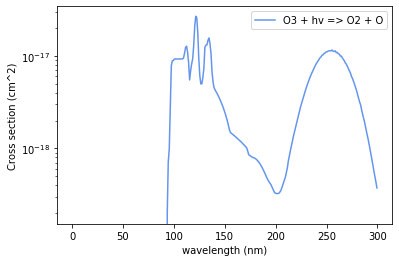

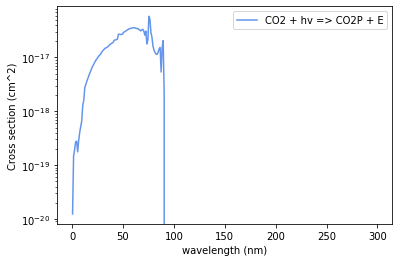

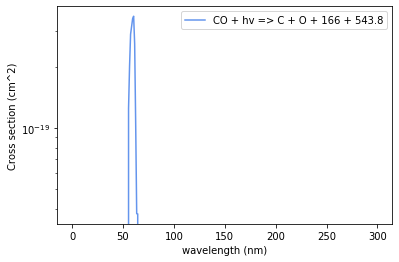

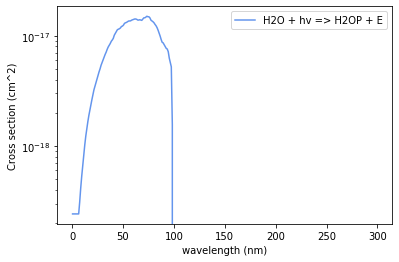

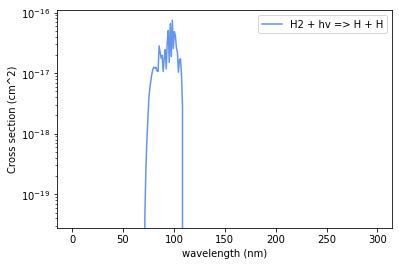

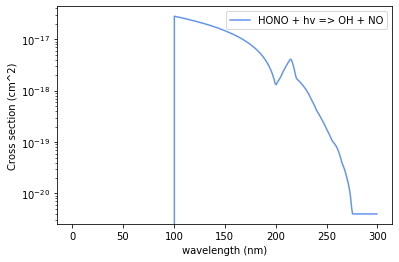

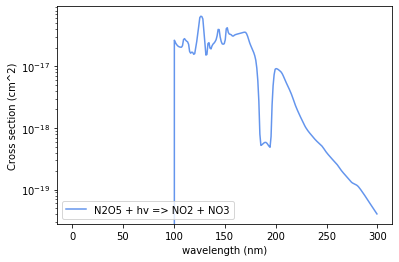

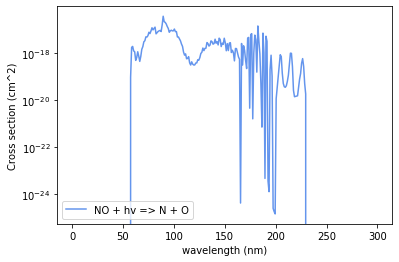

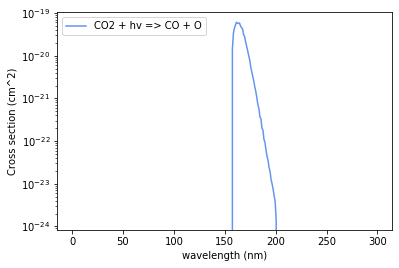

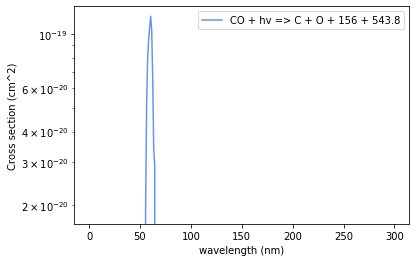

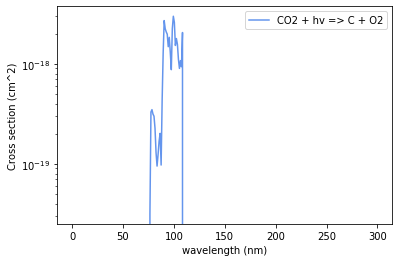

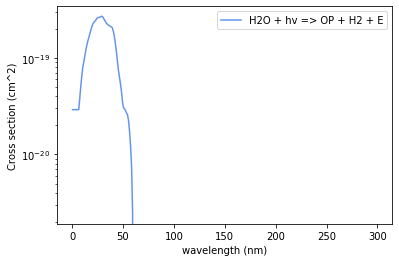

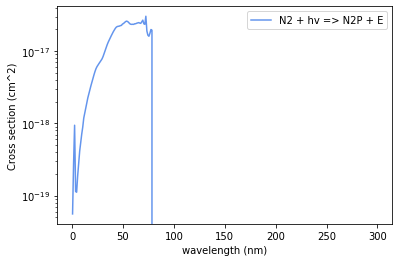

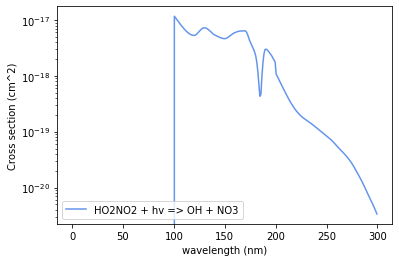

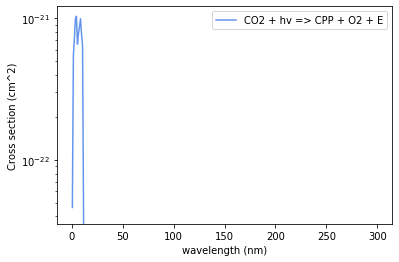

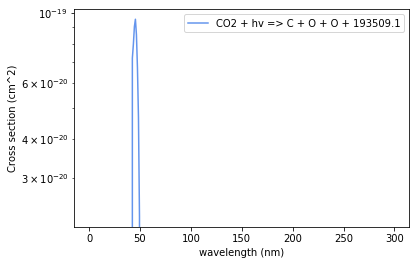

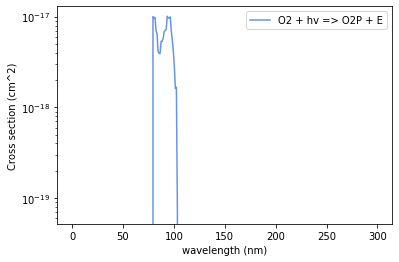

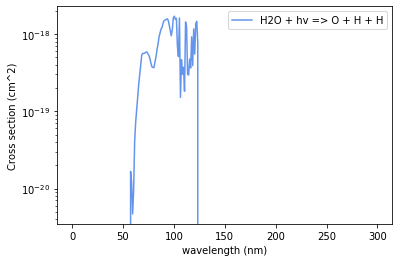

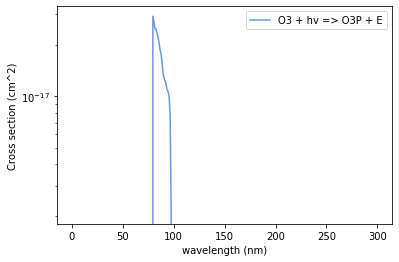

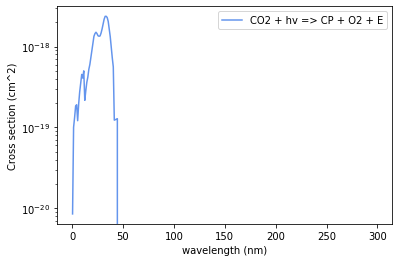

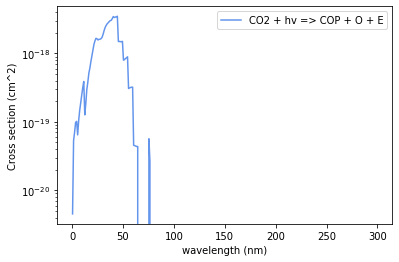

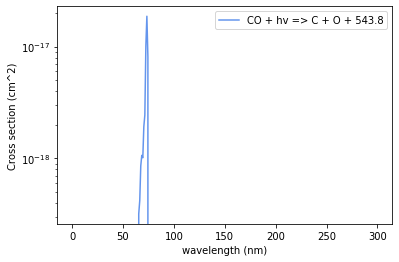

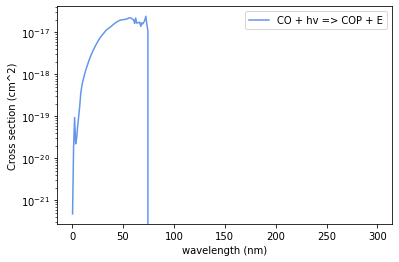

In [10]:
for k in xsects_0_to_300:
    fig = plt.figure()
    plt.plot(wvs_0_to_300, xsects_0_to_300[k], color="cornflowerblue", label=k)
    plt.xlabel("wavelength (nm)")
    plt.ylabel("Cross section (cm^2)")
    plt.yscale("log")
    plt.legend()
    plt.show()
    

In [97]:
for k in xsects_0_to_300:
    print(k)

CO2 + hv => CO2P + E
O3 + hv => O3P + E
CO + hv => C + OP + E
HO2NO2 + hv => HO2 + NO2
HO2NO2 + hv => OH + NO3
CO2 + hv => CO2PP + E + E
H2 + hv => H + H
N2O5 + hv => NO2 + NO3
HONO + hv => OH + NO
H + hv => HP + E
CO2 + hv => CO + O1D
CO2 + hv => OP + CO + E
O2 + hv => O2P + E
CO + hv => C + O + 166 + 543.8
H2O + hv => H2OP + E
O3 + hv => O2 + O
CO2 + hv => COP + OP + E
H2O + hv => O + H + H
HONO2 + hv => OH + NO2
O2 + hv => O + O
CO2 + hv => C + O + O + 193509.1
CO + hv => O + CP + E
CO2 + hv => CPP + O2 + E
H2O + hv => O1D + H2
H2O + hv => HP + OH+ E
H2 + hv => HP + H + E
N2O + hv => N2 + O1D
CO2 + hv => CO + O
CO2 + hv => C + O + O + 165513.4
CO2 + hv => OP + CP + O
CO2 + hv => CP + O2 + E
CO + hv => C + O + 193 + 543.8
NO2 + hv => NO + O
NO + hv => NOP + E
N2 + hv => NP + N + E
OH + hv => O + H
CO2 + hv => COP + O + E
H2O + hv => OP + H2 + E
CO2 + hv => C + O2
NO + hv => N + O
H2O + hv => OH + H
H2O2 + hv => OH + OH
H2O + hv => OHP + H + E
CO2 + hv => C + O + O + 156503.7
H2O2 + h

## Dealing with reactions with the same products but different released energies - added 15 Jan 2021

Add together the reactions with multple entries with the same products, but different energy released. This is:

CO + hv -> C + O + energy

CO2 + hv -> C + O + O + energy

In [112]:
CO2_bustup_label = "CO2 + hv => C + O + O"
CO_bustup_label = "CO + hv => C + O"

xsects_CO2_bustup_total = np.zeros_like(xsects_0_to_300["CO2 + hv => C + O + O + 193509.1"])
xsects_CO_bustup_total = np.zeros_like(xsects_0_to_300["CO + hv => C + O + 193 + 543.8"])

for k in xsects_0_to_300:
    if CO2_bustup_label in k:
        xsects_CO2_bustup_total += xsects_0_to_300[k]
    if CO_bustup_label in k:
        xsects_CO_bustup_total += xsects_0_to_300[k]
        
# put the summed xsect arrays into xsects_0_to_300
xsects_0_to_300[CO2_bustup_label] = xsects_CO2_bustup_total
xsects_0_to_300[CO_bustup_label] = xsects_CO_bustup_total

Get a list of the reactions since I don't need crosssections for them all, since some we already have from the previous study.

(Note 15 January 2021: This will now contain both the entries for, e.g., CO -> C + O + (energy), and CO -> C + O. The following code will only keep the one without the extra energy, which is the sum of all of those, as done above.)

In [99]:
for k in xsects_0_to_300:
    print(k)

CO2 + hv => CO2P + E
O3 + hv => O3P + E
CO + hv => C + OP + E
HO2NO2 + hv => HO2 + NO2
HO2NO2 + hv => OH + NO3
CO2 + hv => CO2PP + E + E
H2 + hv => H + H
N2O5 + hv => NO2 + NO3
HONO + hv => OH + NO
H + hv => HP + E
CO2 + hv => CO + O1D
CO2 + hv => OP + CO + E
O2 + hv => O2P + E
CO + hv => C + O + 166 + 543.8
H2O + hv => H2OP + E
O3 + hv => O2 + O
CO2 + hv => COP + OP + E
H2O + hv => O + H + H
HONO2 + hv => OH + NO2
O2 + hv => O + O
CO2 + hv => C + O + O + 193509.1
CO + hv => O + CP + E
CO2 + hv => CPP + O2 + E
H2O + hv => O1D + H2
H2O + hv => HP + OH+ E
H2 + hv => HP + H + E
N2O + hv => N2 + O1D
CO2 + hv => CO + O
CO2 + hv => C + O + O + 165513.4
CO2 + hv => OP + CP + O
CO2 + hv => CP + O2 + E
CO + hv => C + O + 193 + 543.8
NO2 + hv => NO + O
NO + hv => NOP + E
N2 + hv => NP + N + E
OH + hv => O + H
CO2 + hv => COP + O + E
H2O + hv => OP + H2 + E
CO2 + hv => C + O2
NO + hv => N + O
H2O + hv => OH + H
H2O2 + hv => OH + OH
H2O + hv => OHP + H + E
CO2 + hv => C + O + O + 156503.7
H2O2 + h

I went through that printout in my notes and collected the reactions I need to keep. Here they are.

In [113]:
# NOTE these two lists are in order!! Elements in Jratetags correspond to those in keep_rxns. Do not alter! Or do it wisely if you must!

keep_rxns = ["H2O + hv => H2OP + E", "H2O + hv => OP + H2 + E", "CO + hv => C + O", "CO + hv => COP + E", "N2O + hv => N2 + O1D", "H2 + hv => H2P + E", 
             "CO + hv => C + OP + E", "NO2 + hv => NO + O", "CO2 + hv => C + O2", "CO2 + hv => CPP + O2 + E", "NO + hv => NOP + E", "H2 + hv => HP + H + E", 
             "H2O + hv => HP + OH+ E", "H2O2 + hv => H2O2P + E", "N2 + hv => N2P + E", "CO2 + hv => COP + OP + E", "CO + hv => O + CP + E", "CO2 + hv => OP + CP + O", 
             "NO + hv => N + O", "CO2 + hv => CP + O2 + E", "CO2 + hv => CO2P + E", "O + hv => OP + E", "H2O + hv => OHP + H + E", "NO2 + hv => NO2P + E", 
             "CO2 + hv => COP + O + E", "N2 + hv => NP + N + E", "CO2 + hv => C + O + O", "CO2 + hv => CO2PP + E + E", "CO2 + hv => OP + CO + E", 
             "O2 + hv => O2P + E", "H + hv => HP + E", "N2O + hv => N2OP + E", "O3 + hv => O3P + E"]

Jratetags = ["JH2OtoH2Opl", "JH2OtoOplpH2", "JCOtoCpO", "JCOtoCOpl", "JN2OtoN2pO1D ", "JH2toH2pl", "JCOtoCpOpl", "JNO2toNOpO", "JCO2toCpO2", "JCO2toCplplpO2", 
             "JNOtoNOpl", "JH2toHplpH", "JH2OtoHplpOH", "JH2O2toH2O2pl", "JN2toN2pl", "JCO2toCOplpOpl", "JCOtoOpCpl", "JCO2toOplpCplpO", "JNOtoNpO", "JCO2toCplpO2", 
             "JCO2toCO2pl", "JOtoOpl", "JH2OtoOHplpH", "JNO2toNO2pl", "JCO2toCOplpO", "JN2toNplpN", "JCO2toCpOpO", "JCO2toCO2plpl", "JCO2toOplpCO", "JO2toO2pl", 
             "JHtoHpl", "JN2OtoN2Opl", "JO3toO3pl"]

In [135]:
# Go through the reactions we need to save the cross sections for and save them to files in the uvxsect folder
for (kr, Jrate) in zip(keep_rxns, Jratetags):
    
    print(kr)
    print(Jrate)
    print()
    dummy_arr = np.zeros((len(xsects_0_to_300[kr]), 2))  # will allow us to create 2 columns, 1 with wavelengths and one with xsects
    dummy_arr[:, 0] = wvs_0_to_300
    dummy_arr[:, 1] = xsects_0_to_300[kr]
    
    np.savetxt("uvxsect/"+Jrate+".csv", dummy_arr, fmt="%.1f,%.18e", header="Wavelength (nm)    Crosssection (cm^2)", delimiter=",", comments="# ")

H2O + hv => H2OP + E
JH2OtoH2Opl

H2O + hv => OP + H2 + E
JH2OtoOplpH2

CO + hv => C + O
JCOtoCpO

CO + hv => COP + E
JCOtoCOpl

N2O + hv => N2 + O1D
JN2OtoN2pO1D 

H2 + hv => H2P + E
JH2toH2pl

CO + hv => C + OP + E
JCOtoCpOpl

NO2 + hv => NO + O
JNO2toNOpO

CO2 + hv => C + O2
JCO2toCpO2

CO2 + hv => CPP + O2 + E
JCO2toCplplpO2

NO + hv => NOP + E
JNOtoNOpl

H2 + hv => HP + H + E
JH2toHplpH

H2O + hv => HP + OH+ E
JH2OtoHplpOH

H2O2 + hv => H2O2P + E
JH2O2toH2O2pl

N2 + hv => N2P + E
JN2toN2pl

CO2 + hv => COP + OP + E
JCO2toCOplpOpl

CO + hv => O + CP + E
JCOtoOpCpl

CO2 + hv => OP + CP + O
JCO2toOplpCplpO

NO + hv => N + O
JNOtoNpO

CO2 + hv => CP + O2 + E
JCO2toCplpO2

CO2 + hv => CO2P + E
JCO2toCO2pl

O + hv => OP + E
JOtoOpl

H2O + hv => OHP + H + E
JH2OtoOHplpH

NO2 + hv => NO2P + E
JNO2toNO2pl

CO2 + hv => COP + O + E
JCO2toCOplpO

N2 + hv => NP + N + E
JN2toNplpN

CO2 + hv => C + O + O
JCO2toCpOpO

CO2 + hv => CO2PP + E + E
JCO2toCO2plpl

CO2 + hv => OP + CO + E
JCO2toOplpCO



In [124]:
"{:.18e}".format(101325.8)

'1.013258000000000029e+05'

# Total ionization cross section and total absorption cross section

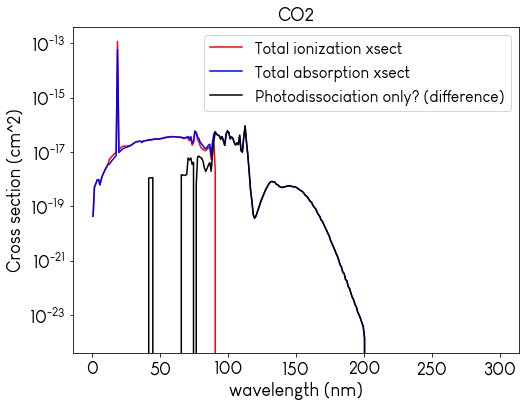

In [59]:
CO2_ionxsect = np.hstack((ionA["CO2"], ionB["CO2"][1:], ionC["CO2"][1:]))
CO2_absxsect = np.hstack((absA["CO2"], absB["CO2"][1:], absC["CO2"][1:]))
wvs = np.hstack((wvsA, wvsB[1:], wvsC[1:]))
fig = plt.figure(figsize=(8,6))
rcParams = matplotlib.rcParams
rcParams["font.sans-serif"] = ["Louis George Caf?"]
rcParams["font.monospace"] = ["FreeMono"]
rcParams["font.size"] = 16
rcParams["axes.labelsize"]= 18
rcParams["xtick.labelsize"] = 18
rcParams["ytick.labelsize"] = 18

plt.plot(wvs, CO2_ionxsect, color="red", label="Total ionization xsect")
plt.plot(wvs, CO2_absxsect, color="blue", label="Total absorption xsect")
plt.plot(wvs, CO2_absxsect-CO2_ionxsect, color="black", label="Photodissociation only? (difference)")
plt.yscale("log")
plt.xlabel("wavelength (nm)")
plt.ylabel("Cross section (cm^2)")
plt.title("CO2")
plt.legend()
plt.show()

# O2 photoionization crosssection from SwRI

In [12]:
o2swri = np.loadtxt("uvxsect/O2-swri.dat")

In [16]:
np.shape(o2swri)

(2579, 7)

In [44]:
# load wavelengths and crosssections
wavel = o2swri[:, 0] / 10 # convert the angstroms to nm
xsect = o2swri[:, 6]
print(xsect[0:6])

[1.00e-22 6.00e-21 3.75e-20 7.01e-20 1.35e-19 1.45e-19]


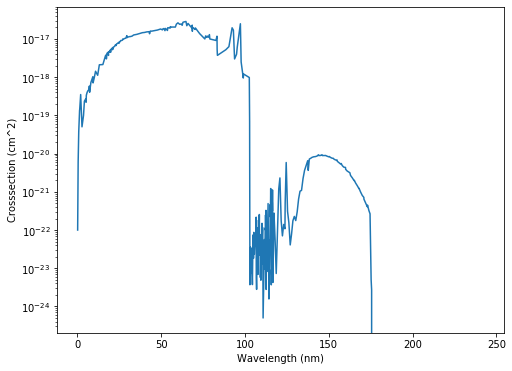

1.1350121187118999e-15


In [48]:
plt.figure(figsize=(8,6))
plt.plot(wavel, xsect)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Crosssection (cm^2)")
plt.yscale("log")
# plt.xscale("log")
plt.show()

total = np.trapz(xsect, x=wavel)
print(total)

1.1362054840748166e-15


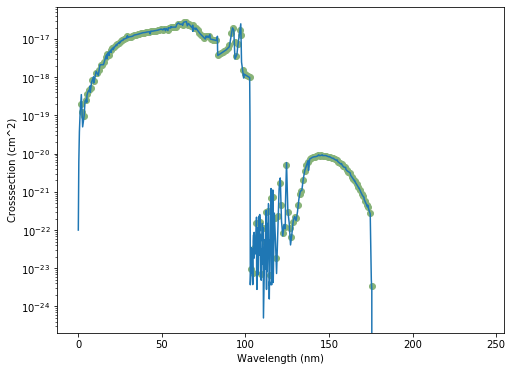

In [53]:
f = si.interp1d(wavel, xsect)
xnew = np.arange(1.5, 175.6, 1)
ynew = f(xnew)
total_new = np.trapz(ynew, x=xnew)
print(total_new)

plt.figure(figsize=(8,6))
plt.plot(wavel, xsect)
plt.scatter(xnew, ynew, color="xkcd:sage green")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Crosssection (cm^2)")
plt.yscale("log")
# plt.xscale("log")
plt.show()

In [54]:
ynew *= (total / total_new)

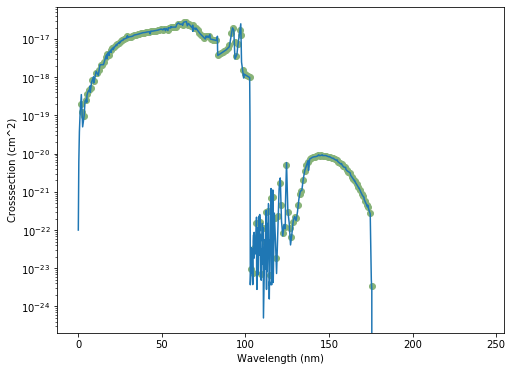

1.1350121187118997e-15


In [55]:
plt.figure(figsize=(8,6))
plt.plot(wavel, xsect)
plt.scatter(xnew, ynew, color="xkcd:sage green")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Crosssection (cm^2)")
plt.yscale("log")
# plt.xscale("log")
plt.show()

total_new2 = np.trapz(ynew, x=xnew)
print(total_new2)

In [56]:
dummy_arr = np.zeros((len(ynew)+1, 2))  # will allow us to create 2 columns, 1 with wavelengths and one with xsects
dummy_arr[1:, 0] = xnew
dummy_arr[1:, 1] = ynew
dummy_arr[0, 0] = 0.5
dummy_arr[0, 1] = dummy_arr[1, 1]  # λ = 0.5 couldn't be interpolated so we fill it in by hand assuming the same as 1 since it won't make much difference.

np.savetxt("uvxsect/O2-photoionize-swri.csv", dummy_arr, fmt="%.1f,%.18e", header="Wavelength (nm)    Crosssection (cm^2)", delimiter=",", comments="# ")

## CO2

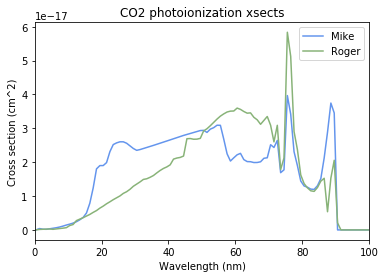

In [6]:
mike_co2 = np.loadtxt("uvxsect/binnedCO2e.csv", comments='#', delimiter=",")
roger_co2 = np.loadtxt("uvxsect/JCO2toCO2pl.csv", comments='#', delimiter=",")

plt.plot(mike_co2[:, 0], mike_co2[:, 1], color="cornflowerblue", label="Mike")
plt.plot(roger_co2[:, 0], roger_co2[:, 1], color="xkcd:sage green", label="Roger")
plt.title("CO2 photoionization xsects")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Cross section (cm^2)")
plt.legend()
plt.xlim(0,100)
plt.show()

### CO2 - total crosssection from Huestis 2010 (Roger's source for total CO2 xsect)

In [42]:
def interpolate_xsects(x_data, y_data, new_x, fn):
    """
    x_data: wavelengths in nm
    y_data: cross sections in cm^2
    new_x: a numpy arange over which to calculate the new cross sections
    """
    total = np.trapz(y_data, x=x_data)
    print("total from data: {}".format(total))
    f = si.interp1d(x_data, y_data)
    new_y = f(new_x)
    total_new = np.trapz(new_y, x=new_x)
    print("total interpolation: {}".format(total_new))

    # make sure we don't exceed the total 
    new_y *= (total / total_new)

    plt.figure(figsize=(8,6))
    plt.plot(x_data, y_data)
    plt.scatter(new_x, new_y, color="xkcd:sage green")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Crosssection (cm^2)")
    plt.yscale("log")
    # plt.xscale("log")
    plt.show()

    total_new_adjusted = np.trapz(new_y, x=new_x)
    
    print("total interpolation, after adjustment: {}".format(total_new_adjusted))
    
    # save to file
    dummy_arr = np.zeros((len(new_y), 2))  # will allow us to create 2 columns, 1 with wavelengths and one with xsects
    dummy_arr[:, 0] = new_x
    dummy_arr[:, 1] = new_y

    np.savetxt("uvxsect/{}.csv".format(fn), dummy_arr, fmt="%.1f,%.18e", header="Wavelength (nm)    Crosssection (cm^2)", delimiter=",", comments="# ")

total from data: 3.173443623896329e-15
total interpolation: 3.0785369380947608e-15


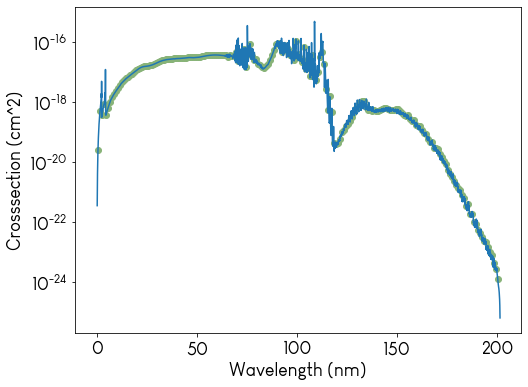

total interpolation, after adjustment: 3.1734436238963294e-15


In [48]:
huestisdata = np.loadtxt("../Resources/huestis2010.txt", delimiter=",")
interpolate_xsects(huestisdata[:, 0], huestisdata[:, 1], np.arange(0.5, 201, 1), "co2xsect-total-huestis2011")